In [3]:
from magic.vectorizer import _search_substructure
from magic.parser import read_sdf_archive
from pathlib import Path
from functools import partial
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
archive_path = Path('test.sdf.bz2')
molecules = [i for i in read_sdf_archive(archive_path)]

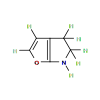

In [5]:
molecules[0]

In [6]:
def get_structure_distribution(pattern: str, pattern_name: str) -> None:
    plt.figure()

    search_pattern = partial(_search_substructure, pattern=pattern)
    pattern_hist_data = np.array([search_pattern(i.OBMol) for i in molecules])

    if all(pattern_hist_data == 0):
        print(f"No matches for {pattern_name}")
        return None

    energies = {}
    for i in range(pattern_hist_data.min(), pattern_hist_data.max() + 1):
        mask = pattern_hist_data == i
        energies[i] = np.round(np.array([float(m.data["free_energy"]) for m, c in zip(molecules, mask) if c]).mean(), decimals=0)

    hue = [energies[i] for i in pattern_hist_data]

    df = pd.DataFrame(zip(pattern_hist_data, hue), columns=('Number of instances', 'Mean free energy'))

    figure = sns.histplot(data=df, x='Number of instances', discrete=True, stat='percent', hue='Mean free energy')
    figure.set(title=pattern_name)
    plt.savefig("./figure-test/features/" + pattern_name, dpi=500)
    return figure

In [22]:
patterns = (
    ('[CX4]', 'Alkyl carbon'),
    ('c', 'Arene carbon'),
    ('n', 'Arene nitrogen'),
    ('*-!:aa-!:*', 'Ortho-substituted ring'),
    ('*-!:aaa-!:*', 'Meta-substituted ring'),
    ('*-!:aaaa-!:*', 'Para-substituted ring'),
    ('[OX2H]', 'Generic hydroxyl'),
    ('[OX2H][cX3]:[c]', 'Phenol'),
    ('[#6][CX3](=O)[#6]', 'Ketone'),
    ('[CX3H1](=O)[#6]', 'Aldehyde'),
    ('[CX3](=O)[OX2H1]', 'Carboxylic acid'),
    ('[CX3;$([C]([#6])[#6]),$([CH][#6])]=[NX2][#6]', 'Imine'),
    ('[NX3][CX3]=[CX3]', 'Enamine'),
    ('[$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8]', 'Nitro'),
    ('[NX1]#[CX2]', 'Nitrile'),
    ('[OX2,OX1-][OX2,OX1-]', 'Peroxide'),
    ('[$([cX3](:*):*),$([cX2+](:*):*)]', 'sp2 Aromatic carbon'),
    ('[$([cX3](:*):*),$([cX2+](:*):*),$([CX3]=*),$([CX2+]=*)]', 'sp2 carbon'),
    ('[$([nX3](:*):*),$([nX2](:*):*),$([#7X2]=*),$([NX3](=*)=*),$([#7X3+](-*)=*),$([#7X3+H]=*)]', 'sp2 Nitrogen'),
    ('[$([NX4+]),$([NX3]);!$(*=*)&!$(*:*)]', 'sp3 Nitrogen')
)

/var/folders/29/5z9shwj13pz12wjwt8rxbzp00000gn/T/ipykernel_79105/1721862712.py:14: RuntimeWarning: Mean of empty slice.
  energies[i] = np.round(np.array([float(m.data["free_energy"]) for m, c in zip(molecules, mask) if c]).mean(), decimals=0)
/opt/homebrew/Caskroom/miniforge/base/envs/molemagic/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No matches for Nitro
No matches for Peroxide


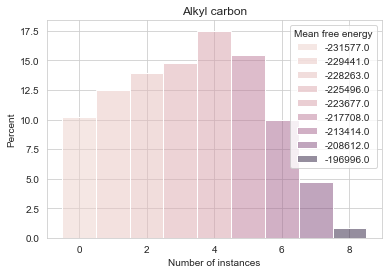

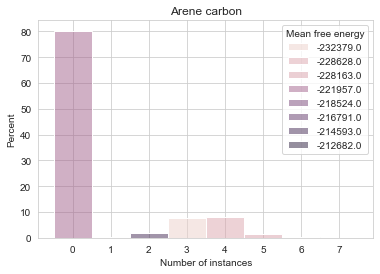

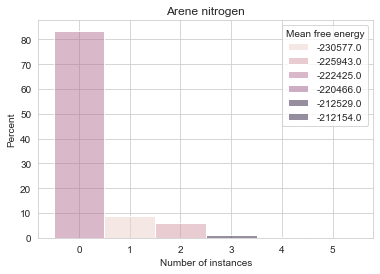

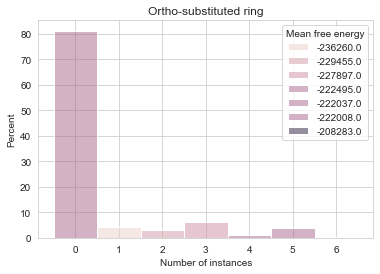

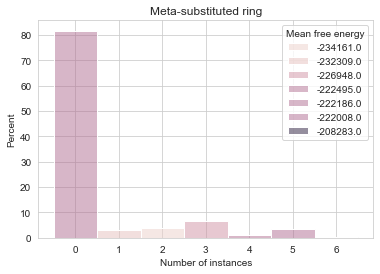

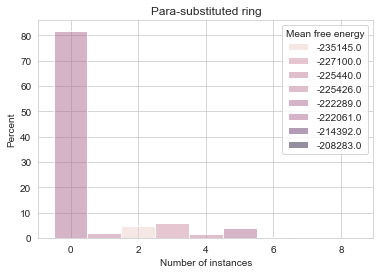

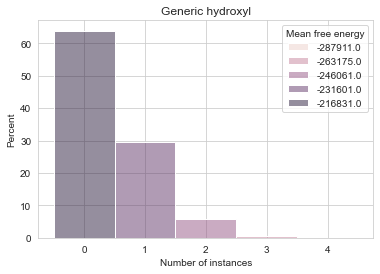

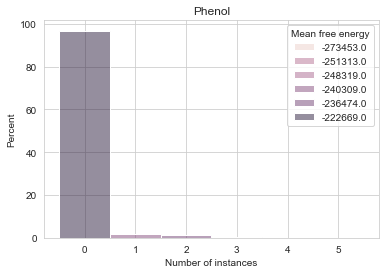

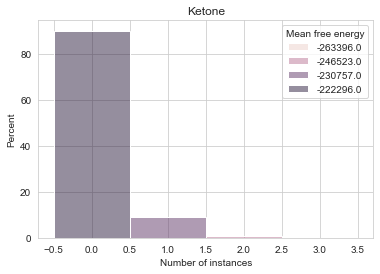

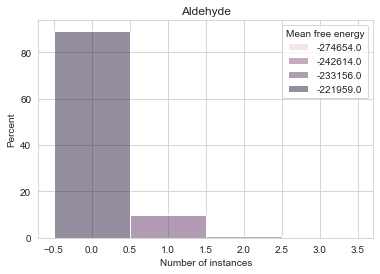

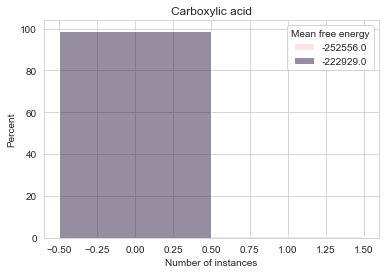

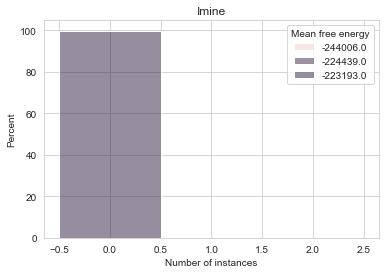

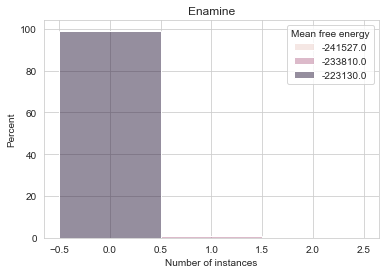

<Figure size 432x288 with 0 Axes>

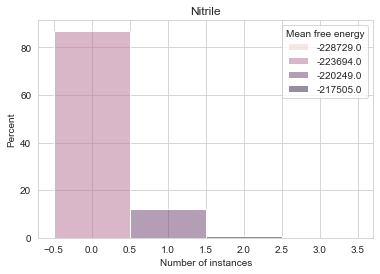

<Figure size 432x288 with 0 Axes>

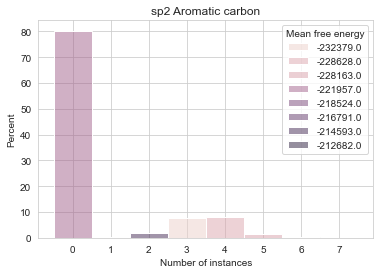

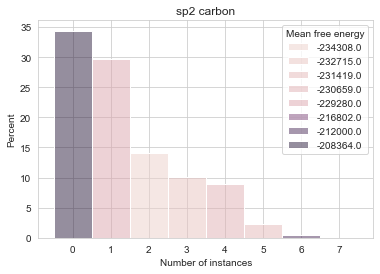

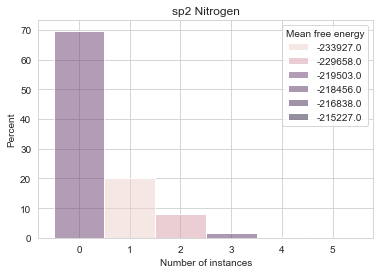

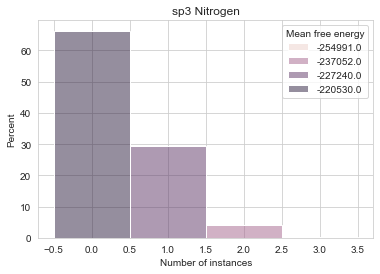

In [23]:
output_dir = Path('figure-test/features')
output_dir.mkdir(exist_ok=True)
sns.set_style('whitegrid')

figures = [get_structure_distribution(*i) for i in patterns]